In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("Bordeaux/n_listings.csv")
df_reviews= pd.read_csv("Bordeaux/n_reviews.csv")

In [28]:
df["host_response_rate"]

0       100%
1       100%
2       100%
3       100%
4       100%
        ... 
6793     99%
6794    100%
6795    100%
6796    100%
6797    100%
Name: host_response_rate, Length: 6798, dtype: object

In [29]:
df_neighbourhood_cleansed = df[['host_id','number_of_reviews','neighbourhood_cleansed']]
df_neighbourhood_cleansed.groupby(by="neighbourhood_cleansed").count()

,host_id,number_of_reviews
neighbourhood_cleansed,,
3M-Bourgailh,8,8
Ambars-et-Lagrave,48,48
Ambs,46,46
Arago-La Chataigneraie,40,40
Arlac,56,56
...,...,...
Sardine,16,16
Talence,279,279
Toctoucau,16,16


Quels sont les pourcentage d’acceptation et de réponse moyen des hosts?

représentez cela à l'aide d'un diagramme par secteur

In [38]:
df["host_response_rate"] = df["host_response_rate"].dropna().apply(lambda x : x.replace("%","")).astype("int")
df["host_acceptance_rate"] = df["host_acceptance_rate"].dropna().apply(lambda x : x.replace("%","")).astype("int")

In [39]:
df_rate_by_neigh =df[['host_acceptance_rate','host_response_rate','neighbourhood_cleansed']]
df_rate_by_neigh


,host_acceptance_rate,host_response_rate,neighbourhood_cleansed
0,99,100,Ambs
1,100,100,Martignas-sur-Jalle
2,78,100,Centre ville (Bordeaux)
3,100,100,Saint Augustin - Tauzin - Alphonse Dupeux
4,100,100,Lormont
...,...,...,...
6793,99,99,Villenave-d'Ornon
6794,0,100,Gradignan
6795,90,100,Villenave-d'Ornon
6796,100,100,Villenave-d'Ornon


In [48]:
df_rate_by_neigh = df_rate_by_neigh.groupby(by="neighbourhood_cleansed").mean()
df_rate_by_neigh = df_rate_by_neigh.reset_index()

In [49]:
df_rate_by_neigh

,neighbourhood_cleansed,host_acceptance_rate,host_response_rate
0,3M-Bourgailh,75.000000,97.875000
1,Ambars-et-Lagrave,72.416667,92.812500
2,Ambs,82.413043,97.586957
3,Arago-La Chataigneraie,93.775000,94.350000
4,Arlac,83.125000,96.964286
...,...,...,...
57,Sardine,91.000000,96.250000
58,Talence,81.985663,95.641577
59,Toctoucau,81.375000,92.687500
60,Verthamon,83.875000,95.187500


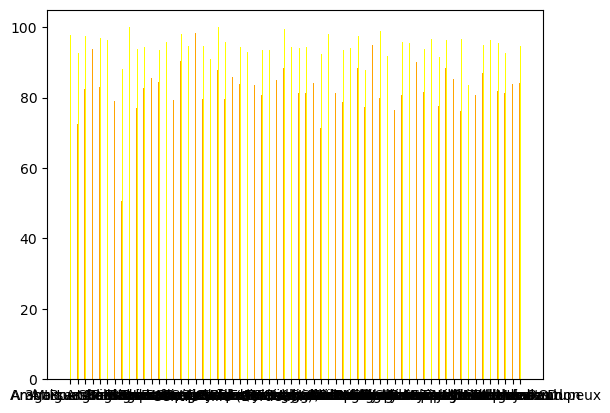

In [50]:
largeur_barre = 0.1
y1 = df_rate_by_neigh['host_acceptance_rate']
y2 = df_rate_by_neigh['host_response_rate']
x1 = range(len(y1))
x2 = [i + largeur_barre for i in x1]
plt.bar(x1, y1, width = largeur_barre, color = 'orange')
plt.bar(x2, y2, width = largeur_barre, color = 'yellow')
plt.xticks([r + largeur_barre / 2 for r in range(len(y1))],df_rate_by_neigh['neighbourhood_cleansed'])
plt.show()


